In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Configure character display
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# Define column names
cols = ['label'] + [f'I{i}' for i in range(1, 14)] + [f'C{i}' for i in range(1, 27)]

# Separate numerical and categorical features
num_features = [f'I{i}' for i in range(1, 14)]  # Numerical features
cat_features = [f'C{i}' for i in range(1, 27)]  # Categorical features

# Load data (first 10,000 rows)
data = pd.read_csv('../../data/raw/train.txt', sep='\t', header=None, names=cols, nrows=10000)

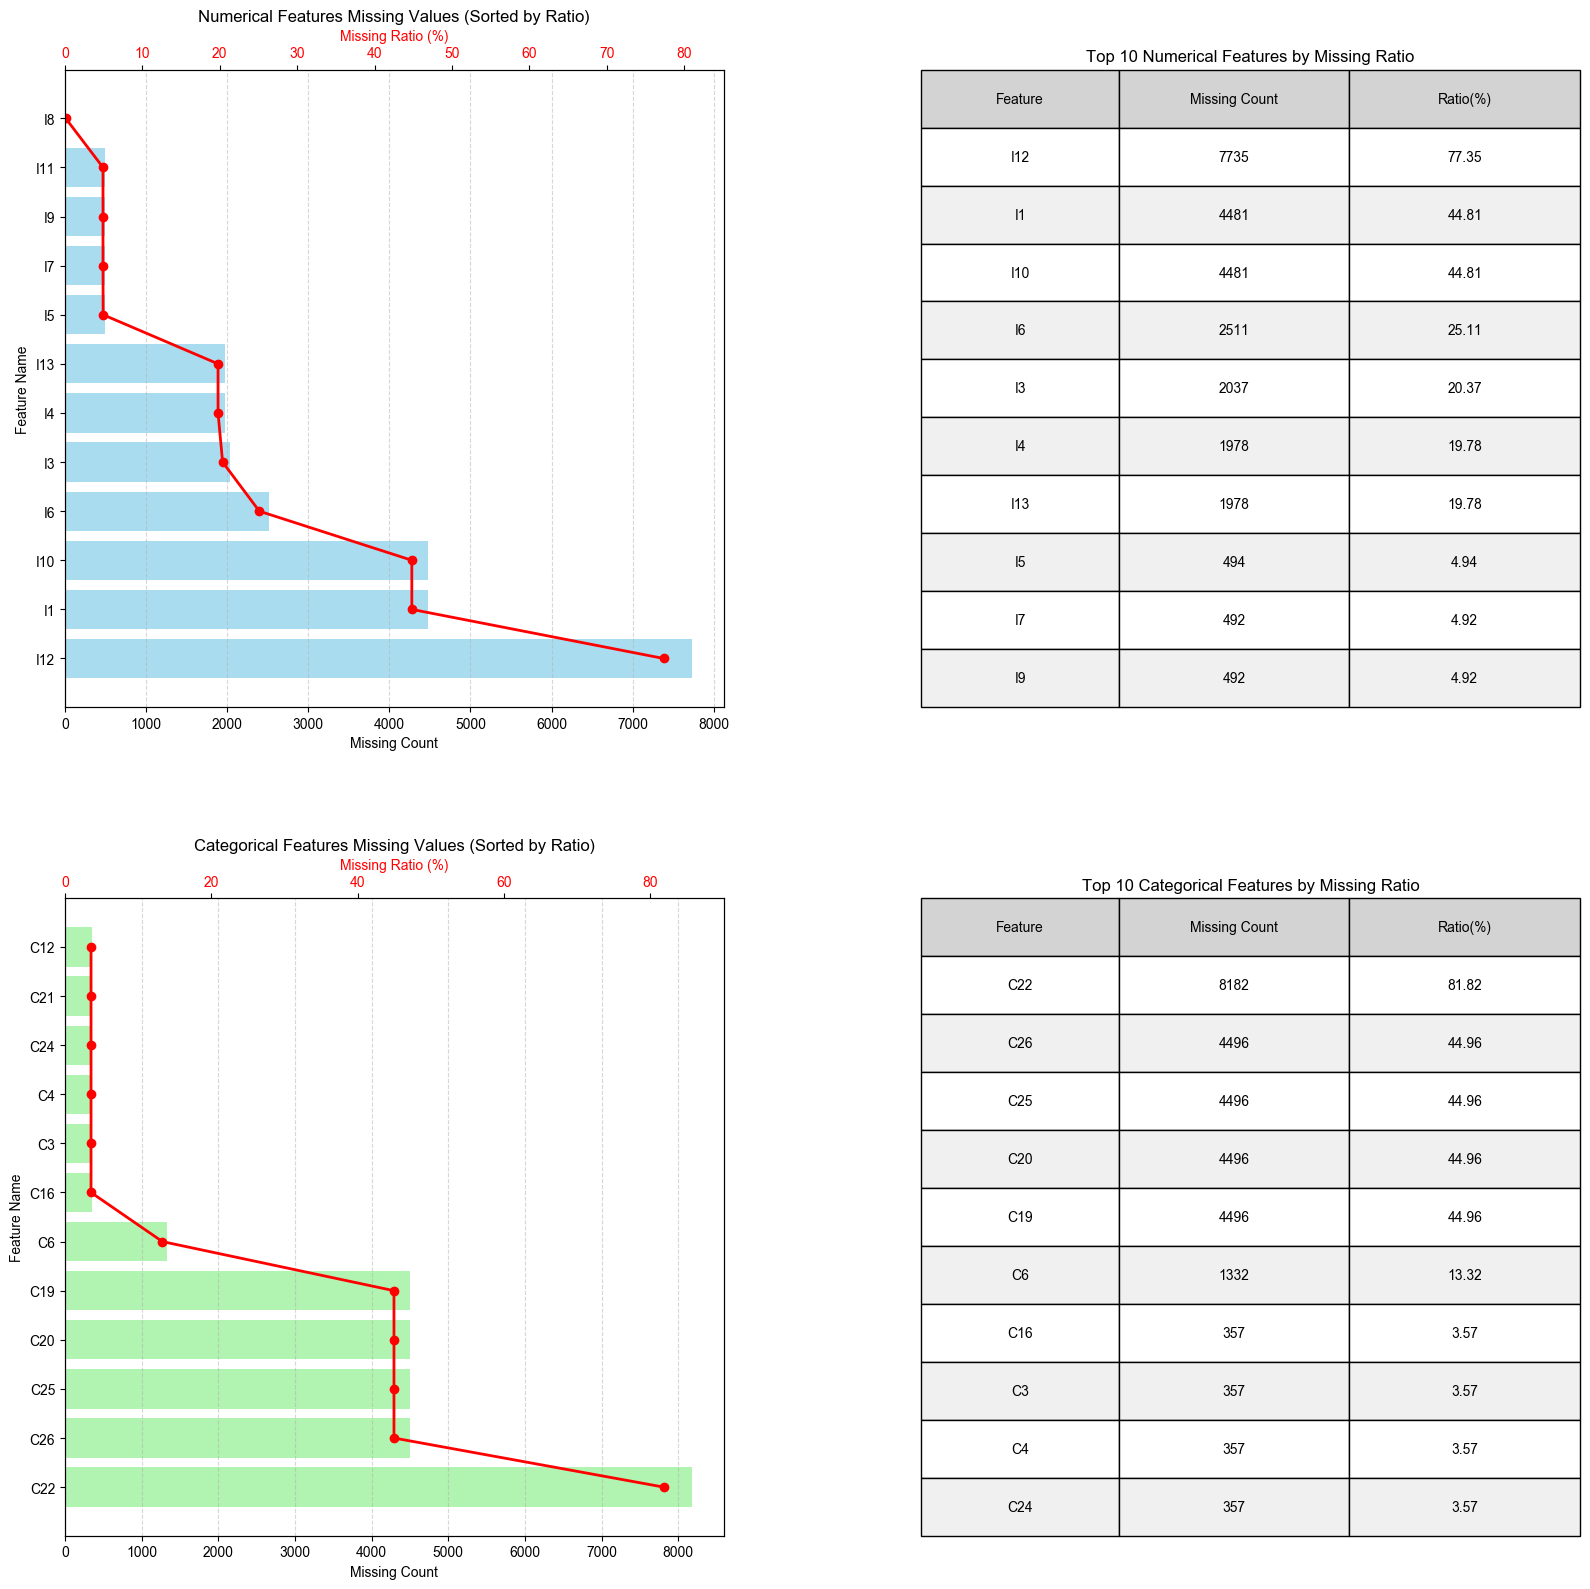

In [12]:
# Feature Analysis - Missing Value Statistics (Bar Chart + Line Chart + Table)
def calculate_missing_stats(features):
    """Calculate missing value statistics for specified features, sorted by missing ratio in descending order"""
    missing_count = data[features].isnull().sum()
    missing_ratio = (missing_count / len(data) * 100).round(2)  # Convert to percentage

    # Combine into DataFrame and sort by missing ratio
    stats = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Ratio(%)': missing_ratio
    }).sort_values(by='Missing Ratio(%)', ascending=False)

    # Keep only features with missing values
    stats = stats[stats['Missing Count'] > 0]
    return stats['Missing Count'], stats['Missing Ratio(%)']


# Calculate missing values for numerical and categorical features (already sorted by ratio)
num_missing_count, num_missing_ratio = calculate_missing_stats(num_features)
cat_missing_count, cat_missing_ratio = calculate_missing_stats(cat_features)


def plot_missing_dual_chart(ax, missing_count, missing_ratio, title, color):
    """Plot missing value chart sorted by ratio on specified axes"""
    # Bar chart: Missing value counts (Y-axis sorted by ratio)
    bars = ax.barh(missing_ratio.index, missing_count, color=color, alpha=0.7)
    ax.set_xlabel('Missing Count', fontsize=10)
    ax.set_ylabel('Feature Name', fontsize=10)
    ax.set_title(title, fontsize=12)

    # Create secondary axis for ratio
    ax2 = ax.twiny()  # Shared Y-axis, independent X-axis
    # Line plot maintains same order as bars (sorted by ratio)
    ax2.plot(missing_ratio.values, missing_ratio.index, 'ro-', linewidth=2, markersize=6)
    ax2.set_xlabel('Missing Ratio (%)', fontsize=10, color='red')
    ax2.tick_params(axis='x', labelcolor='red')
    ax2.set_xlim(0, max(missing_ratio.values) * 1.1)  # Ratio axis range

    # Add grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    return ax


def plot_missing_table(ax, missing_count, missing_ratio, title, max_rows=10):
    """Plot top missing features table sorted by ratio on specified axes"""
    # Get top N features (already sorted by ratio)
    top_ratio = missing_ratio.head(max_rows)
    top_count = missing_count.loc[top_ratio.index]  # Maintain same order as ratio

    # Clear axis
    ax.clear()
    ax.set_title(title, fontsize=12)
    ax.axis('off')

    # Create table
    table = Table(ax, bbox=[0, 0, 1, 1])
    n_rows = len(top_ratio)

    # Add header
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.add_cell(0, 0, width=0.3, height=0.1, text='Feature', loc='center', facecolor='lightgray')
    table.add_cell(0, 1, width=0.35, height=0.1, text='Missing Count', loc='center', facecolor='lightgray')
    table.add_cell(0, 2, width=0.35, height=0.1, text='Ratio(%)', loc='center', facecolor='lightgray')

    # Add data rows (sorted by ratio)
    for i in range(n_rows):
        feature = top_ratio.index[i]
        count = top_count.iloc[i]
        ratio = top_ratio.iloc[i]

        # Alternate row colors
        facecolor = 'white' if i % 2 == 0 else '#f0f0f0'

        table.add_cell(i + 1, 0, width=0.3, height=0.1, text=feature, loc='center', facecolor=facecolor)
        table.add_cell(i + 1, 1, width=0.35, height=0.1, text=str(count), loc='center', facecolor=facecolor)
        table.add_cell(i + 1, 2, width=0.35, height=0.1, text=f"{ratio:.2f}", loc='center', facecolor=facecolor)

    ax.add_table(table)
    return ax


# Create layout
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # 2x2 grid layout

# First row: Numerical features (sorted by ratio)
plot_missing_dual_chart(
    axes[0, 0],
    num_missing_count,
    num_missing_ratio,
    'Numerical Features Missing Values (Sorted by Ratio)',
    'skyblue'
)

plot_missing_table(
    axes[0, 1],
    num_missing_count,
    num_missing_ratio,
    'Top 10 Numerical Features by Missing Ratio'
)

# Second row: Categorical features (sorted by ratio)
plot_missing_dual_chart(
    axes[1, 0],
    cat_missing_count,
    cat_missing_ratio,
    'Categorical Features Missing Values (Sorted by Ratio)',
    'lightgreen'
)

plot_missing_table(
    axes[1, 1],
    cat_missing_count,
    cat_missing_ratio,
    'Top 10 Categorical Features by Missing Ratio'
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()